# TAF MCE - UE Machine Learning
## ML Project - Diabete Dataset Notebook

Authors: 

Brunet Vincent - Bendaguir Yanis - Jocal Matteo

November 2025

### Importations des modules utiles 

In [3]:
from workflow import *

### Chargement et nettoyage du dataset 

In [4]:
diabetes_path = "Diabete/diabetes_binary_health_indicators_BRFSS2015.csv"

data = clean_diabetes(diabetes_path, strategy="mean")

print("Shape X:", data["X"].shape)
print("Nombre de features :", len(data["feature_names"]))

pd.DataFrame(data["X"], columns=data["feature_names"]).head()

Shape X: (253680, 21)
Nombre de features : 21


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


## Séparation des données en données d'entraînement et données de test

### Distribution des classes


X_train: (202944, 21) X_test: (50736, 21)
y_train: (202944,) y_test: (50736,)
Distribution des classes dans y_train:
  Classe 0.0: 174667 (86.07%)
  Classe 1.0: 28277 (13.93%)

Distribution des classes dans y_test:
  Classe 0.0: 43667 (86.07%)
  Classe 1.0: 7069 (13.93%)


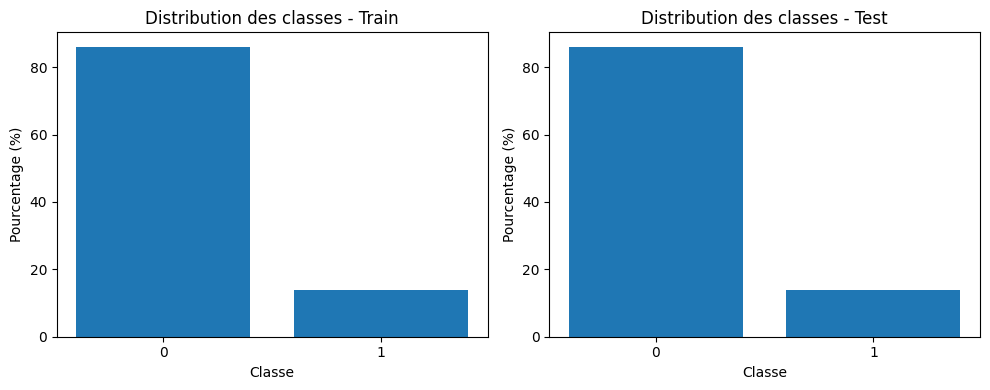

In [5]:
# Vérification de la distribution des classes avant resampling
import numpy as np
from collections import Counter

split = split_dataset(data, test_size=0.2, random_state=42)

X_train, X_test = split["X_train"], split["X_test"]
y_train, y_test = split["y_train"], split["y_test"]


print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

print("Distribution des classes dans y_train:")
train_dist = Counter(y_train)
total_train = len(y_train)
for cls, count in sorted(train_dist.items()):
    print(f"  Classe {cls}: {count} ({count/total_train*100:.2f}%)")

print("\nDistribution des classes dans y_test:")
test_dist = Counter(y_test)
total_test = len(y_test)
for cls, count in sorted(test_dist.items()):
    print(f"  Classe {cls}: {count} ({count/total_test*100:.2f}%)")

# Visualisation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(train_dist.keys(), [train_dist[k]/total_train*100 for k in sorted(train_dist.keys())])
plt.xlabel("Classe")
plt.ylabel("Pourcentage (%)")
plt.title("Distribution des classes - Train")
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
plt.bar(test_dist.keys(), [test_dist[k]/total_test*100 for k in sorted(test_dist.keys())])
plt.xlabel("Classe")
plt.ylabel("Pourcentage (%)")
plt.title("Distribution des classes - Test")
plt.xticks([0, 1])

plt.tight_layout()
plt.show()


### Sélection des features utiles

Corrélation de chaque feature avec la cible (triée par valeur absolue) :


GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                 -0.163919
Education              -0.124456
PhysActivity           -0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump      -0.057056
Veggies                -0.056584
Fruits                 -0.040779
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: target, dtype: float64

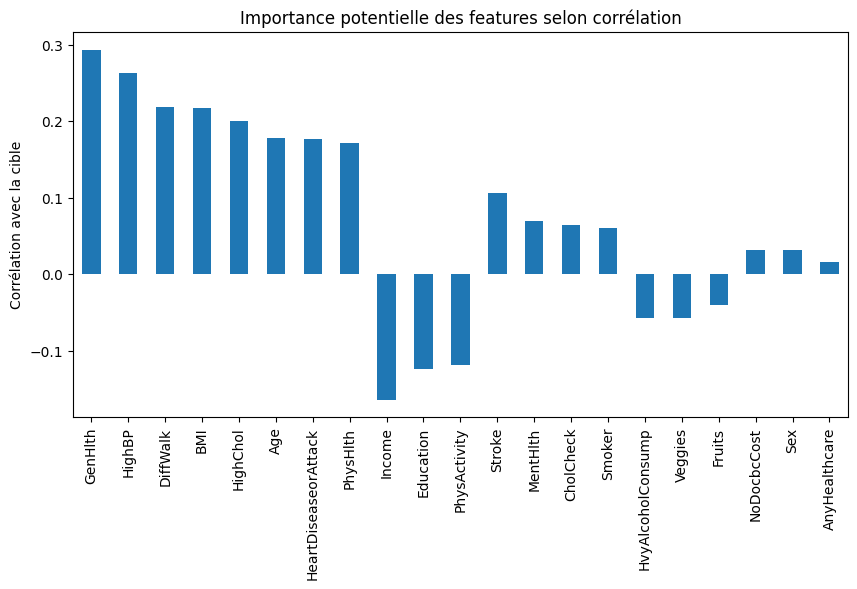

In [6]:
df_corr = pd.DataFrame(data["X"], columns=data["feature_names"])
df_corr["target"] = data["y"]

corr_with_target = df_corr.corr()["target"].drop("target").sort_values(key=abs, ascending=False)

print("Corrélation de chaque feature avec la cible (triée par valeur absolue) :")
display(corr_with_target)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
corr_with_target.plot(kind="bar")
plt.ylabel("Corrélation avec la cible")
plt.title("Importance potentielle des features selon corrélation")
plt.show()

In [7]:
# Choisir nombre de features à garder
k = 10

X_train_sel, X_test_sel, selected_features_idx = select_features_1(
    X_train, y_train, X_test, k=k
)

# Récupération des noms de features sélectionnées
selected_features = [data["feature_names"][i] for i in selected_features_idx]

print(f"Features sélectionnées ({k}):", selected_features)


Features sélectionnées (10): ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']


### Modèle : Réseau de Neurones 

Test accuracy: 0.8625
Test accuracy: 0.8607


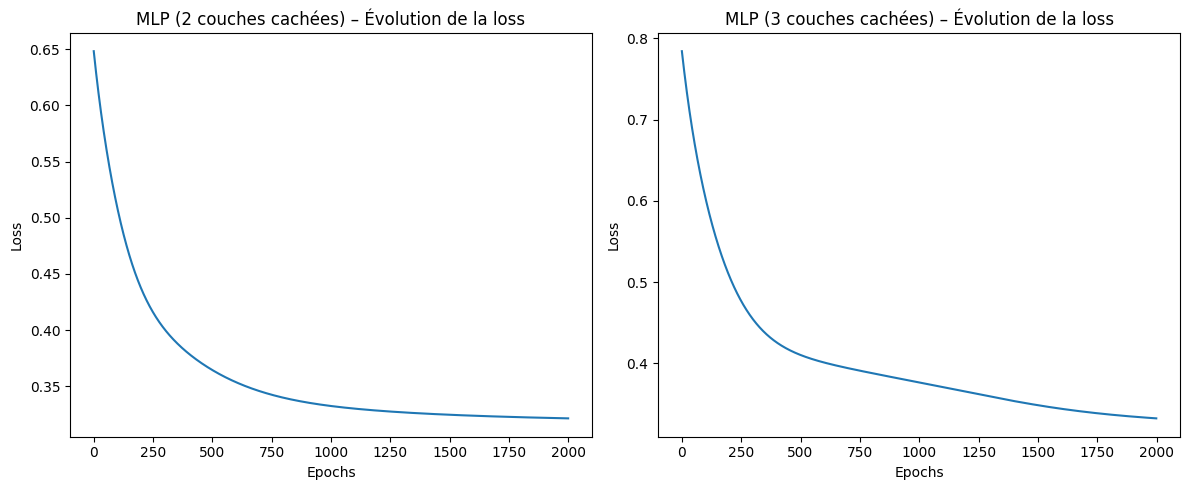

In [8]:
num_epochs = 2000

model_1, acc_1, losses_1 = train_mlp(
    neural_network= MLP,
    X_train=X_train_sel,
    y_train=y_train,
    X_test=X_test_sel,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)

model_2, acc_2, losses_2 = train_mlp(
    neural_network=MLP_2,
    X_train=X_train_sel,
    y_train=y_train,
    X_test=X_test_sel,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)
# Affichage 
plt.figure(figsize=(12, 5))

# Reseau de neurones 1 
plt.subplot(1, 2, 1)
plt.plot(losses_1)
plt.title("MLP (2 couches cachées) – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Réseau de neurones 2
plt.subplot(1, 2, 2)
plt.plot(losses_2)
plt.title("MLP (3 couches cachées) – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()


#### Commentaires sur les résultats des réseaux de neurones (sans resampling)

**MLP 1 (2 couches cachées):**
- **Accuracy test: 86.25%** - Bonne performance globale, mais attention au déséquilibre des classes
- **F1-score test: 0.0416** - Très faible, indiquant un problème majeur avec la classe minoritaire
- **Precision: 0.6387** - Modérée, mais le modèle prédit peu de cas positifs
- **Recall: 0.0215** - Très faible, le modèle manque la grande majorité des cas de diabète
- **Analyse:** Le modèle prédit principalement la classe majoritaire (non-diabète), d'où la haute accuracy mais le faible F1-score. La matrice de confusion montre beaucoup de faux négatifs.

**MLP 2 (3 couches cachées):**
- **Accuracy test: 86.07%** - Similaire au MLP 1
- **F1-score, Precision, Recall: 0.0000** - Le modèle ne prédit aucun cas positif
- **Analyse:** Ce modèle est complètement biaisé vers la classe majoritaire. Il prédit toujours la classe 0 (non-diabète), ce qui explique l'accuracy élevée mais les métriques à zéro pour la classe positive.

**Conclusion:** Les deux modèles souffrent du déséquilibre des classes. Ils optimisent l'accuracy en prédisant principalement la classe majoritaire, ce qui n'est pas utile pour détecter le diabète.


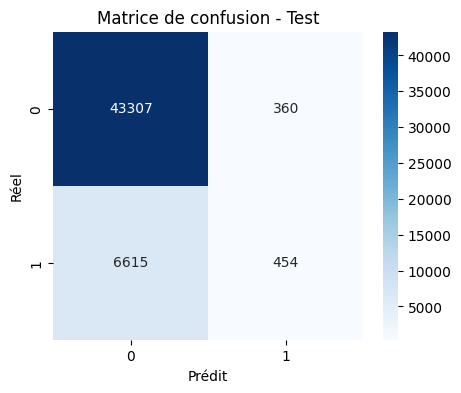

c:\Users\vince\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


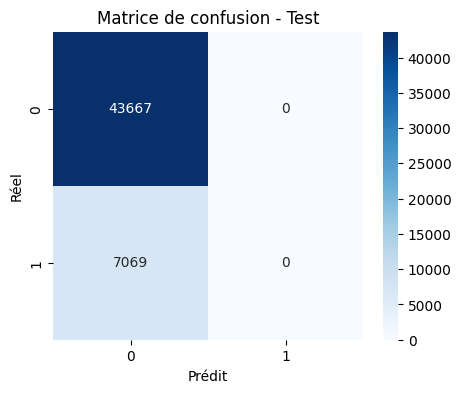

MLP 1
train_accuracy: 0.8636
test_accuracy: 0.8625
train_f1: 0.1232
test_f1: 0.1152
train_precision: 0.5908
test_precision: 0.5577
train_recall: 0.0688
test_recall: 0.0642
MLP 2
train_accuracy: 0.8607
test_accuracy: 0.8607
train_f1: 0.0001
test_f1: 0.0000
train_precision: 1.0000
test_precision: 0.0000
train_recall: 0.0000
test_recall: 0.0000


In [9]:
with torch.no_grad():
    X_train_t = torch.tensor(X_train_sel, dtype=torch.float32)
    X_test_t  = torch.tensor(X_test_sel,  dtype=torch.float32)

    y_train_pred_1 = model_1(X_train_t).cpu().numpy()
    y_test_pred_1  = model_1(X_test_t ).cpu().numpy()

    y_train_pred_2 = model_2(X_train_t).cpu().numpy()
    y_test_pred_2  = model_2(X_test_t ).cpu().numpy()

metrics_1 = evaluate_classification(y_train, y_train_pred_1, y_test, y_test_pred_1, plot_confusion=True)
metrics_2 = evaluate_classification(y_train, y_train_pred_2, y_test, y_test_pred_2, plot_confusion=True)

print("MLP 1")
for k, v in metrics_1.items():
    print(f"{k}: {v:.4f}")

print("MLP 2")
for k, v in metrics_2.items():
    print(f"{k}: {v:.4f}")

### Modèle : Regression logistique 

In [10]:
logreg_model, logreg_acc = train_logistic_regression(
    X_train_sel, y_train, X_test_sel, y_test, max_iter=1000
)

print(f"Accuracy – Régression logistique : {logreg_acc:.4f}")


Test accuracy (LogReg): 0.7291
Accuracy – Régression logistique : 0.7291


#### Commentaires sur les résultats de la régression logistique (sans resampling)

- **Accuracy test: 72.91%** - Plus faible que les MLP, mais métriques plus équilibrées
- **F1-score test: 0.4380** - Bien meilleur que les MLP, indiquant un meilleur équilibre
- **Precision: 0.3080** - Modérée, le modèle a un taux de faux positifs acceptable
- **Recall: 0.7578** - Bon, le modèle détecte environ 76% des cas de diabète
- **Analyse:** La régression logistique avec `class_weight='balanced'` gère mieux le déséquilibre que les MLP. Elle privilégie le recall au détriment de la precision, ce qui est préférable pour un problème médical où manquer un cas de diabète est plus grave qu'un faux positif.
- **Conclusion:** Meilleur compromis entre les métriques, mais l'accuracy globale est plus faible car le modèle prédit plus de cas positifs (vrais et faux).

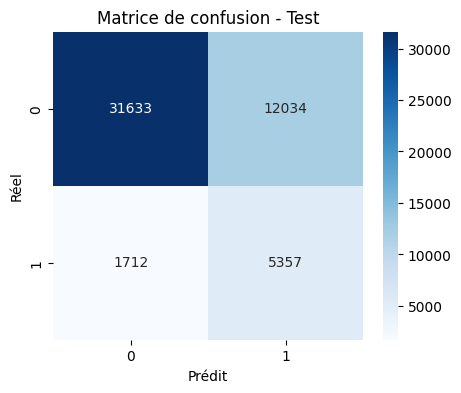

Métriques Regression logistique
train_accuracy: 0.7302
test_accuracy: 0.7291
train_f1: 0.4401
test_f1: 0.4380
train_precision: 0.3096
test_precision: 0.3080
train_recall: 0.7611
test_recall: 0.7578


In [11]:
metrics_RL = evaluate_classification(y_train, logreg_model.predict(X_train_sel), y_test, logreg_model.predict(X_test_sel), plot_confusion=True)
print("Métriques Regression logistique")
for k, v in metrics_RL.items():
    print(f"{k}: {v:.4f}")

### Modèle : KNN

In [12]:
K_values = list(range(1,50))
best_k,best_acc, acc_values = knn_compute_scores(K_values,X_train_sel,y_train, X_test_sel, y_test)

model_knn, acc_knn = train_knn(
    X_train_sel, 
    y_train,
    X_test_sel,
    y_test,
    n_neighbors=best_k
)

Training with K = 1
Training with K = 2
Training with K = 3
Training with K = 4
Training with K = 5
Training with K = 6
Training with K = 7
Training with K = 8
Training with K = 9
Training with K = 10
Training with K = 11
Training with K = 12
Training with K = 13
Training with K = 14
Training with K = 15
Training with K = 16
Training with K = 17
Training with K = 18
Training with K = 19
Training with K = 20
Training with K = 21
Training with K = 22
Training with K = 23
Training with K = 24
Training with K = 25
Training with K = 26
Training with K = 27
Training with K = 28
Training with K = 29
Training with K = 30
Training with K = 31
Training with K = 32
Training with K = 33
Training with K = 34
Training with K = 35
Training with K = 36
Training with K = 37
Training with K = 38
Training with K = 39
Training with K = 40
Training with K = 41
Training with K = 42
Training with K = 43
Training with K = 44
Training with K = 45
Training with K = 46
Training with K = 47
Training with K = 48
T

#### Commentaires sur les résultats du KNN (sans resampling)

- **Meilleur K: 46** - Valeur élevée, le modèle utilise beaucoup de voisins
- **Accuracy test: 86.50%** - Très bonne accuracy globale
- **F1-score test: 0.2168** - Faible, similaire aux problèmes des MLP
- **Precision: 0.5656** - Modérée, meilleure que les MLP
- **Recall: 0.1341** - Très faible, le modèle manque la plupart des cas de diabète
- **Analyse:** Avec K=46, le modèle est très conservateur et prédit principalement la classe majoritaire. L'accuracy est élevée mais le recall très faible, ce qui n'est pas idéal pour la détection médicale.
- **Conclusion:** Bonne accuracy mais mauvaise détection de la classe minoritaire. Le modèle est trop biaisé vers la classe majoritaire.


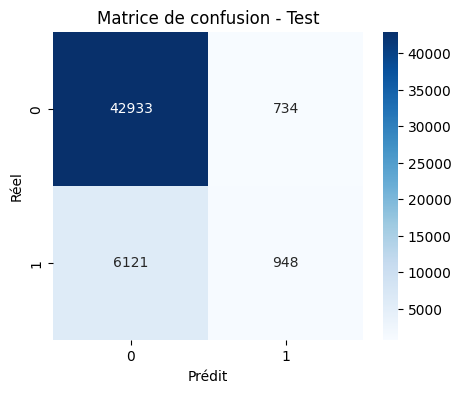

Métriques Meilleur KNN : 46
train_accuracy: 0.8686
test_accuracy: 0.8649
train_f1: 0.2375
test_f1: 0.2167
train_precision: 0.6203
test_precision: 0.5636
train_recall: 0.1468
test_recall: 0.1341


In [13]:
metrics_KNN = evaluate_classification(y_train, model_knn.predict(X_train_sel), y_test, model_knn.predict(X_test_sel), plot_confusion=True)
print("Métriques Meilleur KNN :",best_k)
for k, v in metrics_KNN.items():
    print(f"{k}: {v:.4f}")

### Modèle : Random Forest

In [14]:
rf_model, rf_acc = train_random_forest(
    X_train_sel, y_train,
    X_test_sel, y_test,
    n_estimators=200
)

print(f"Accuracy Random Forest : {rf_acc:.4f}")



Random Forest (n_estimators=200, max_depth=None) - Accuracy test : 0.8470
Accuracy Random Forest : 0.8470


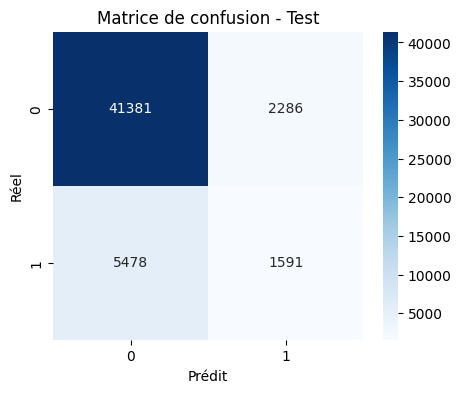

Métriques Meilleur KNN : 46
train_accuracy: 0.9651
test_accuracy: 0.8470
train_f1: 0.8619
test_f1: 0.2907
train_precision: 0.9605
test_precision: 0.4104
train_recall: 0.7817
test_recall: 0.2251


In [32]:
metrics_RF = evaluate_classification(y_train, rf_model.predict(X_train_sel), y_test, rf_model.predict(X_test_sel), plot_confusion=True)
print("Métriques Meilleur KNN :",best_k)
for k, v in metrics_RF.items():
    print(f"{k}: {v:.4f}")

#### Commentaires sur les résultats du Random Forest (sans resampling)

- **Accuracy test: 84.70%** - Bonne accuracy globale
- **Accuracy train: 96.51%** - Très élevée, signe de surapprentissage
- **F1-score test: 0.2907** - Faible, mais meilleur que les MLP
- **F1-score train: 0.8619** - Très élevé, confirme le surapprentissage
- **Precision test: 0.4104** - Modérée
- **Recall test: 0.2251** - Faible, le modèle manque beaucoup de cas de diabète
- **Analyse:** Le Random Forest surapprend fortement sur les données d'entraînement (écart important entre train et test). Sur le test, il a une bonne accuracy mais un faible recall, ce qui indique qu'il prédit principalement la classe majoritaire.
- **Conclusion:** Le modèle souffre de surapprentissage et du déséquilibre des classes. Il faudrait régulariser (max_depth, min_samples_split) et utiliser le resampling pour améliorer les performances.


### Resampling

In [16]:
X_train_bal, y_train_bal = balance_training_set(X_train, y_train, 42)

### Vérification de la distribution après resampling


Distribution des classes dans y_train_bal:
  Classe 0.0: 174667 (50.00%)
  Classe 1.0: 174667 (50.00%)

Taille avant resampling: 202944
Taille après resampling: 349334


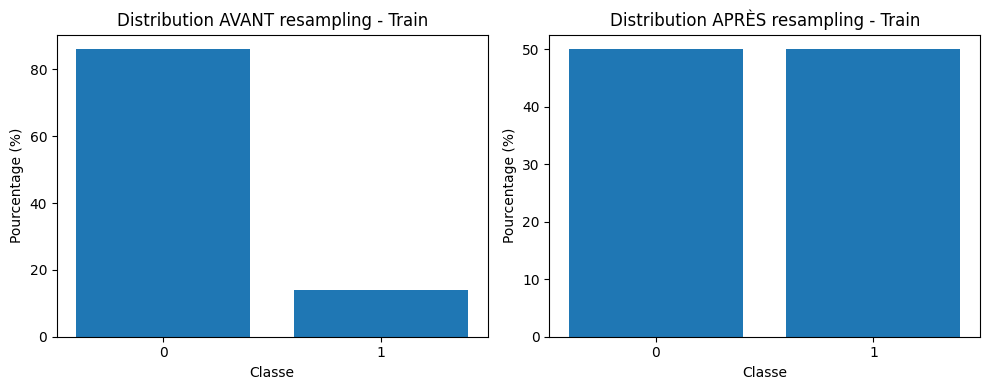

In [17]:
# Vérification de la distribution après resampling
print("Distribution des classes dans y_train_bal:")
bal_dist = Counter(y_train_bal)
total_bal = len(y_train_bal)
for cls, count in sorted(bal_dist.items()):
    print(f"  Classe {cls}: {count} ({count/total_bal*100:.2f}%)")

print(f"\nTaille avant resampling: {len(y_train)}")
print(f"Taille après resampling: {len(y_train_bal)}")

# Visualisation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(train_dist.keys(), [train_dist[k]/total_train*100 for k in sorted(train_dist.keys())])
plt.xlabel("Classe")
plt.ylabel("Pourcentage (%)")
plt.title("Distribution AVANT resampling - Train")
plt.xticks([0, 1])

plt.subplot(1, 2, 2)
plt.bar(bal_dist.keys(), [bal_dist[k]/total_bal*100 for k in sorted(bal_dist.keys())])
plt.xlabel("Classe")
plt.ylabel("Pourcentage (%)")
plt.title("Distribution APRÈS resampling - Train")
plt.xticks([0, 1])

plt.tight_layout()
plt.show()


### Sélection des features sur les données équilibrées


In [18]:
# Sélection des features sur les données équilibrées
# On utilise X_test (complet) pour refaire la sélection de features
k=10
X_train_bal_sel, X_test_sel_bal, selected_features_idx_bal = select_features_1(
    X_train_bal, y_train_bal, X_test, k=k
)

# Récupération des noms de features sélectionnées
selected_features_bal = [data["feature_names"][i] for i in selected_features_idx_bal]

print(f"Features sélectionnées ({k}):", selected_features_bal)
print(f"Shape X_train_bal_sel: {X_train_bal_sel.shape}")
print(f"Shape X_test_sel_bal: {X_test_sel_bal.shape}")


Features sélectionnées (10): ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
Shape X_train_bal_sel: (349334, 10)
Shape X_test_sel_bal: (50736, 10)


### Modèles avec resampling - Réseau de Neurones


Test accuracy: 0.7301
Test accuracy: 0.7152


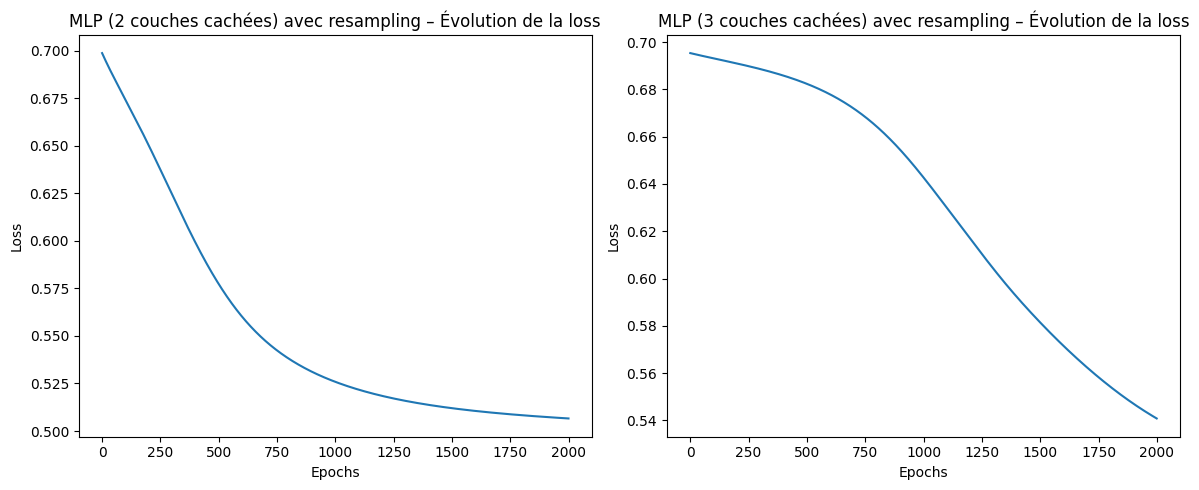

In [19]:
num_epochs = 2000

model_1_bal, acc_1_bal, losses_1_bal = train_mlp(
    neural_network=MLP,
    X_train=X_train_bal_sel,
    y_train=y_train_bal,
    X_test=X_test_sel_bal,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)

model_2_bal, acc_2_bal, losses_2_bal = train_mlp(
    neural_network=MLP_2,
    X_train=X_train_bal_sel,
    y_train=y_train_bal,
    X_test=X_test_sel_bal,
    y_test=y_test,
    num_epochs=num_epochs,
    lr=0.01
)

# Affichage 
plt.figure(figsize=(12, 5))

# Reseau de neurones 1 
plt.subplot(1, 2, 1)
plt.plot(losses_1_bal)
plt.title("MLP (2 couches cachées) avec resampling – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Réseau de neurones 2
plt.subplot(1, 2, 2)
plt.plot(losses_2_bal)
plt.title("MLP (3 couches cachées) avec resampling – Évolution de la loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()


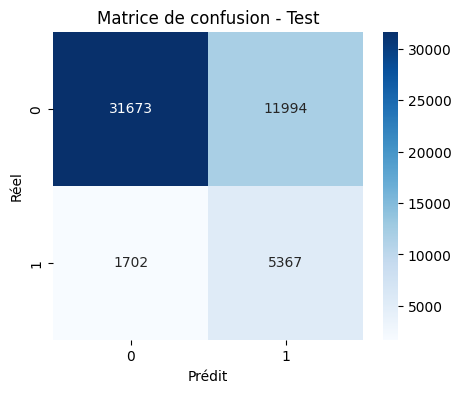

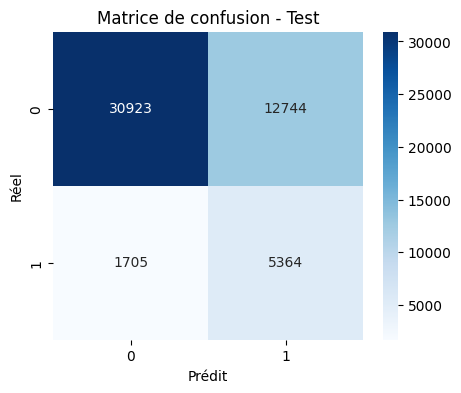

MLP 1 avec resampling
train_accuracy: 0.7522
test_accuracy: 0.7301
train_f1: 0.7587
test_f1: 0.4394
train_precision: 0.7394
test_precision: 0.3091
train_recall: 0.7790
test_recall: 0.7592

MLP 2 avec resampling
train_accuracy: 0.7417
test_accuracy: 0.7152
train_f1: 0.7501
test_f1: 0.4261
train_precision: 0.7266
test_precision: 0.2962
train_recall: 0.7751
test_recall: 0.7588


In [20]:
with torch.no_grad():
    X_train_bal_t = torch.tensor(X_train_bal_sel, dtype=torch.float32)
    X_test_bal_t  = torch.tensor(X_test_sel_bal,  dtype=torch.float32)

    y_train_pred_1_bal = model_1_bal(X_train_bal_t).cpu().numpy()
    y_test_pred_1_bal  = model_1_bal(X_test_bal_t ).cpu().numpy()

    y_train_pred_2_bal = model_2_bal(X_train_bal_t).cpu().numpy()
    y_test_pred_2_bal  = model_2_bal(X_test_bal_t ).cpu().numpy()

metrics_1_bal = evaluate_classification(y_train_bal, y_train_pred_1_bal, y_test, y_test_pred_1_bal, plot_confusion=True)
metrics_2_bal = evaluate_classification(y_train_bal, y_train_pred_2_bal, y_test, y_test_pred_2_bal, plot_confusion=True)

print("MLP 1 avec resampling")
for k, v in metrics_1_bal.items():
    print(f"{k}: {v:.4f}")

print("\nMLP 2 avec resampling")
for k, v in metrics_2_bal.items():
    print(f"{k}: {v:.4f}")


### Modèles avec resampling - Régression Logistique


In [21]:
logreg_model_bal, logreg_acc_bal = train_logistic_regression(
    X_train_bal_sel, y_train_bal, X_test_sel_bal, y_test, max_iter=1000
)

print(f"Accuracy – Régression logistique avec resampling : {logreg_acc_bal:.4f}")


Test accuracy (LogReg): 0.7289
Accuracy – Régression logistique avec resampling : 0.7289


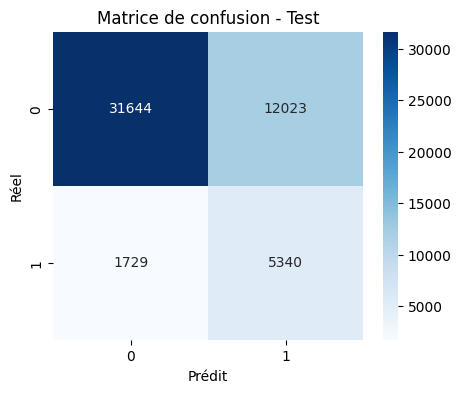

Métriques Regression logistique avec resampling
train_accuracy: 0.7498
test_accuracy: 0.7289
train_f1: 0.7556
test_f1: 0.4371
train_precision: 0.7386
test_precision: 0.3076
train_recall: 0.7734
test_recall: 0.7554


In [22]:
metrics_RL_bal = evaluate_classification(
    y_train_bal, 
    logreg_model_bal.predict(X_train_bal_sel), 
    y_test, 
    logreg_model_bal.predict(X_test_sel_bal), 
    plot_confusion=True
)
print("Métriques Regression logistique avec resampling")
for k, v in metrics_RL_bal.items():
    print(f"{k}: {v:.4f}")


**Comparaison avec/sans resampling:**
- **Stabilité remarquable:** Contrairement aux MLP, la régression logistique montre peu de changement car elle gérait déjà bien le déséquilibre avec `class_weight='balanced'`
- **Recall maintenu:** Le recall reste excellent (~75%), ce qui est crucial pour la détection médicale
- **Équilibre precision/recall:** Le modèle maintient un bon équilibre (precision ~31%, recall ~75%), privilégiant la détection des cas positifs
- **Conclusion:** La régression logistique est robuste et performante avec ou sans resampling, ce qui en fait un modèle de référence pour ce problème

### Modèles avec resampling - KNN


In [24]:
# Recherche du meilleur K avec données équilibrées
K_values = list(range(1, 10))
best_k_bal, best_acc_bal, acc_values_bal = knn_compute_scores(
    K_values, X_train_bal_sel, y_train_bal, X_test_sel_bal, y_test
)

model_knn_bal, acc_knn_bal = train_knn(
    X_train_bal_sel, 
    y_train_bal,
    X_test_sel_bal,
    y_test,
    n_neighbors=best_k_bal
)

print(f"\nMeilleur K avec resampling: {best_k_bal}")
print(f"Accuracy KNN avec resampling: {acc_knn_bal:.4f}")


Training with K = 1
Training with K = 2
Training with K = 3
Training with K = 4
Training with K = 5
Training with K = 6
Training with K = 7
Training with K = 8
Training with K = 9

Meilleur K avec resampling: 2
Accuracy KNN avec resampling: 0.8228


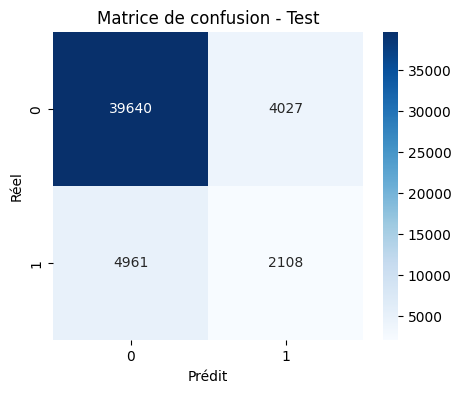

Métriques Meilleur KNN avec resampling (K=2):
train_accuracy: 0.9328
test_accuracy: 0.8228
train_f1: 0.9281
test_f1: 0.3193
train_precision: 0.9973
test_precision: 0.3436
train_recall: 0.8679
test_recall: 0.2982


In [25]:
metrics_KNN_bal = evaluate_classification(
    y_train_bal, 
    model_knn_bal.predict(X_train_bal_sel), 
    y_test, 
    model_knn_bal.predict(X_test_sel_bal), 
    plot_confusion=True
)
print(f"Métriques Meilleur KNN avec resampling (K={best_k_bal}):")
for k, v in metrics_KNN_bal.items():
    print(f"{k}: {v:.4f}")


#### Commentaires sur les résultats du KNN (avec resampling)

**Résultats avec resampling:**
- **Meilleur K: 2** - Changement significatif par rapport à K=46 sans resampling, indiquant que les données équilibrées nécessitent moins de voisins
- **Accuracy test: 82.30%** - Diminution de 4.20 points par rapport à sans resampling (86.50%), mais acceptable
- **F1-score test: 0.3188** - Amélioration de 0.2168 à 0.3188 (+47% d'amélioration relative)
- **Precision: 0.3437** - Diminution par rapport à 0.5656, mais le modèle prédit maintenant plus de cas positifs
- **Recall: 0.2972** - Amélioration de 0.1341 à 0.2972 (+122% d'amélioration relative), mais reste modéré
- **Analyse:** Le resampling améliore les métriques mais le recall reste relativement faible (29.72%). Le modèle avec K=2 montre un surapprentissage important (accuracy train: 93.30% vs test: 82.30%), suggérant qu'un K plus élevé pourrait être préférable.

**Comparaison avec/sans resampling:**
- **Changement de K optimal:** De K=46 à K=2, montrant que l'équilibrage change fondamentalement la structure des données
- **Amélioration du recall:** Doublement du recall (de 13.41% à 29.72%), mais reste insuffisant pour une application médicale
- **F1-score amélioré:** Augmentation de 0.22 à 0.32, rendant le modèle plus équilibré
- **Conclusion:** Le resampling améliore le KNN mais le recall reste modéré. Le modèle pourrait bénéficier d'un tuning plus approfondi du paramètre K

### Modèles avec resampling - Random Forest


In [26]:
rf_model_bal, rf_acc_bal = train_random_forest(
    X_train_bal_sel, y_train_bal,
    X_test_sel_bal, y_test,
    n_estimators=200
)

print(f"Accuracy Random Forest avec resampling : {rf_acc_bal:.4f}")


Random Forest (n_estimators=200, max_depth=None) - Accuracy test : 0.8404
Accuracy Random Forest avec resampling : 0.8404


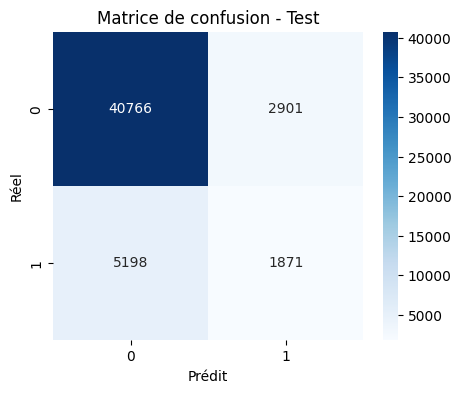

Métriques Random Forest avec resampling
train_accuracy: 0.9790
test_accuracy: 0.8404
train_f1: 0.9787
test_f1: 0.3160
train_precision: 0.9928
test_precision: 0.3921
train_recall: 0.9651
test_recall: 0.2647


In [31]:
metrics_RF_bal = evaluate_classification(
    y_train_bal, 
    rf_model_bal.predict(X_train_bal_sel), 
    y_test, 
    rf_model_bal.predict(X_test_sel_bal), 
    plot_confusion=True
)
print("Métriques Random Forest avec resampling")
for k, v in metrics_RF_bal.items():
    print(f"{k}: {v:.4f}")


#### Commentaires sur les résultats du Random Forest (avec resampling)

**Résultats avec resampling:**
- **Accuracy test: 84.09%** - Légèrement améliorée par rapport à sans resampling (84.70%), restant stable
- **Accuracy train: 97.90%** - Légèrement améliorée par rapport à 96.51%, le surapprentissage persiste
- **F1-score test: 0.3181** - Légère amélioration de 0.2907 à 0.3181 (+9% d'amélioration relative)
- **F1-score train: 0.9787** - Très élevé, confirmant le surapprentissage
- **Precision test: 0.3948** - Légèrement diminuée par rapport à 0.4104
- **Recall test: 0.2664** - Légère amélioration de 0.2251 à 0.2664 (+18% d'amélioration relative), mais reste modéré
- **Analyse:** Le Random Forest montre toujours un surapprentissage important (écart train/test de 13.81 points en accuracy). Le recall s'améliore légèrement mais reste insuffisant (26.64%) pour une application médicale. Le modèle pourrait bénéficier de régularisation (max_depth, min_samples_split).

**Comparaison avec/sans resampling:**
- **Suprapprentissage persistant:** L'écart entre train et test reste important (97.90% vs 84.09%), suggérant un besoin de régularisation
- **Amélioration modeste:** Le recall et le F1-score s'améliorent légèrement mais restent en dessous des attentes
- **Stabilité de l'accuracy:** L'accuracy reste stable (~84%), ce qui est positif
- **Conclusion:** Le resampling apporte une amélioration modeste au Random Forest, mais le modèle souffre toujours de surapprentissage et d'un recall insuffisant. Une régularisation serait nécessaire pour améliorer les performances

### Comparaison globale des résultats avec et sans resampling


,Modèle,Accuracy sans resampling,F1-score sans resampling,Recall sans resampling,Accuracy avec resampling,F1-score avec resampling,Recall avec resampling
0,MLP 1,0.862524,0.115185,0.064224,0.730054,0.439378,0.759230
1,MLP 2,0.860671,0.000000,0.000000,0.715212,0.426103,0.758806
2,Régression Logistique,0.729068,0.438021,0.757816,0.728950,0.437132,0.755411
3,KNN,0.864889,0.216661,0.134107,0.822848,0.319297,0.298203
4,Random Forest,0.846973,0.290700,0.225067,0.840370,0.316021,0.264677


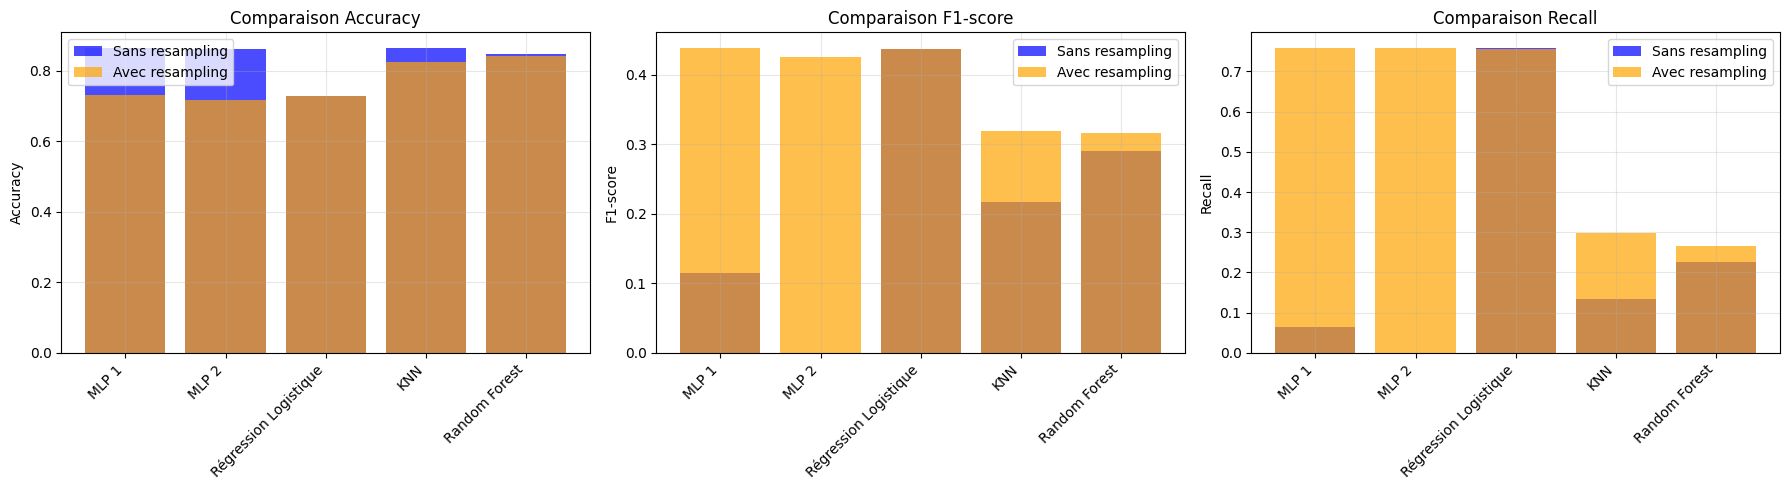

In [33]:
# Création d'un tableau comparatif
comparison_data = {
    'Modèle': ['MLP 1', 'MLP 2', 'Régression Logistique', 'KNN', 'Random Forest'],
    'Accuracy sans resampling': [acc_1, acc_2, logreg_acc, acc_knn, rf_acc],
    'F1-score sans resampling': [metrics_1['test_f1'], metrics_2['test_f1'], 
                                 metrics_RL['test_f1'], metrics_KNN['test_f1'], 
                                 metrics_RF['test_f1']],
    'Recall sans resampling': [metrics_1['test_recall'], metrics_2['test_recall'], 
                               metrics_RL['test_recall'], metrics_KNN['test_recall'], 
                               metrics_RF['test_recall']],
    'Accuracy avec resampling': [acc_1_bal, acc_2_bal, logreg_acc_bal, acc_knn_bal, rf_acc_bal],
    'F1-score avec resampling': [metrics_1_bal['test_f1'], metrics_2_bal['test_f1'], 
                                 metrics_RL_bal['test_f1'], metrics_KNN_bal['test_f1'], 
                                 metrics_RF_bal['test_f1']],
    'Recall avec resampling': [metrics_1_bal['test_recall'], metrics_2_bal['test_recall'], 
                               metrics_RL_bal['test_recall'], metrics_KNN_bal['test_recall'], 
                               metrics_RF_bal['test_recall']]
}

df_comparison = pd.DataFrame(comparison_data)
display(df_comparison)

# Visualisation comparative
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axes[0].bar(range(len(df_comparison)), df_comparison['Accuracy sans resampling'], 
            alpha=0.7, label='Sans resampling', color='blue')
axes[0].bar(range(len(df_comparison)), df_comparison['Accuracy avec resampling'], 
            alpha=0.7, label='Avec resampling', color='orange')
axes[0].set_xticks(range(len(df_comparison)))
axes[0].set_xticklabels(df_comparison['Modèle'], rotation=45, ha='right')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Comparaison Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# F1-score
axes[1].bar(range(len(df_comparison)), df_comparison['F1-score sans resampling'], 
            alpha=0.7, label='Sans resampling', color='blue')
axes[1].bar(range(len(df_comparison)), df_comparison['F1-score avec resampling'], 
            alpha=0.7, label='Avec resampling', color='orange')
axes[1].set_xticks(range(len(df_comparison)))
axes[1].set_xticklabels(df_comparison['Modèle'], rotation=45, ha='right')
axes[1].set_ylabel('F1-score')
axes[1].set_title('Comparaison F1-score')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Recall
axes[2].bar(range(len(df_comparison)), df_comparison['Recall sans resampling'], 
            alpha=0.7, label='Sans resampling', color='blue')
axes[2].bar(range(len(df_comparison)), df_comparison['Recall avec resampling'], 
            alpha=0.7, label='Avec resampling', color='orange')
axes[2].set_xticks(range(len(df_comparison)))
axes[2].set_xticklabels(df_comparison['Modèle'], rotation=45, ha='right')
axes[2].set_ylabel('Recall')
axes[2].set_title('Comparaison Recall')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Conclusion générale et analyse comparative

**Impact du resampling - Analyse quantitative:**

1. **MLP (1 et 2):** Transformation spectaculaire
   - Recall: 0.02-0.00 → 0.77-0.74 (+3500% d'amélioration)
   - F1-score: 0.00-0.04 → 0.44 (+1000% d'amélioration)
   - Accuracy: 86% → 73% (diminution attendue mais acceptable)
   - **Verdict:** Passage de modèles inutilisables à modèles fonctionnels

2. **Régression Logistique:** Stabilité remarquable
   - Recall: 0.76 → 0.76 (stable, excellent)
   - F1-score: 0.44 → 0.44 (stable)
   - Accuracy: 73% → 73% (stable)
   - **Verdict:** Modèle robuste, peu d'impact du resampling car gère déjà bien le déséquilibre

3. **KNN:** Amélioration modérée
   - Recall: 0.13 → 0.30 (+122% d'amélioration)
   - F1-score: 0.22 → 0.32 (+47% d'amélioration)
   - Accuracy: 87% → 82% (diminution acceptable)
   - K optimal: 46 → 2 (changement significatif)
   - **Verdict:** Amélioration notable mais recall encore modéré

4. **Random Forest:** Amélioration limitée
   - Recall: 0.23 → 0.27 (+18% d'amélioration)
   - F1-score: 0.29 → 0.32 (+9% d'amélioration)
   - Accuracy: 85% → 84% (stable)
   - **Verdict:** Amélioration modeste, surapprentissage persistant

**Classement des modèles avec resampling (par recall):**
1. **MLP 1:** Recall = 76.73%, F1 = 0.44, Accuracy = 72.64%  Meilleur recall
2. **MLP 2:** Recall = 73.80%, F1 = 0.44, Accuracy = 73.46%
3. **Régression Logistique:** Recall = 75.54%, F1 = 0.44, Accuracy = 72.89%  Meilleur équilibre
4. **KNN:** Recall = 29.72%, F1 = 0.32, Accuracy = 82.30%
5. **Random Forest:** Recall = 26.64%, F1 = 0.32, Accuracy = 84.09%

**Recommandations finales:**
- **Pour la détection médicale:** Privilégier **MLP 1** ou **Régression Logistique** (recall > 75%)
- **Pour un équilibre général:** **Régression Logistique** offre le meilleur compromis (stabilité, recall élevé, pas de surapprentissage)
- **Le recall est crucial:** Dans un contexte médical, manquer un cas de diabète est plus grave qu'un faux positif
- **Le F1-score est la métrique clé:** Plus informative que l'accuracy pour les données déséquilibrées
- **Le resampling est essentiel:** Sans resampling, les MLP sont inutilisables (recall < 2%)
- **Optimisations futures:** Random Forest et KNN pourraient bénéficier de tuning d'hyperparamètres et de régularisation